DATA CLEANING

In [2]:
import pandas as pd
df=pd.read_csv('/Project+/Datasets/housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset=df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [4]:
X=dataset[:,0:10]
Y=dataset[:,10]

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [6]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [8]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [9]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


MODEL TRAINING

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [12]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=500,
          validation_data=(X_val, Y_val))

Epoch 1/500
32/32 [==============================] - 0s 5ms/step - loss: 0.2338 - accuracy: 0.9080 - val_loss: 0.1993 - val_accuracy: 0.9087
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.2347 - accuracy: 0.9070 - val_loss: 0.1986 - val_accuracy: 0.9087
Epoch 3/500
32/32 [==============================] - 0s 4ms/step - loss: 0.2335 - accuracy: 0.9031 - val_loss: 0.1974 - val_accuracy: 0.9132
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.9070 - val_loss: 0.1978 - val_accuracy: 0.9041
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9100 - val_loss: 0.1974 - val_accuracy: 0.9041
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9070 - val_loss: 0.1975 - val_accuracy: 0.9178
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.9051 - val_loss: 0.1982 - val_accuracy: 0.9087
Epoch 8/500
3

In [26]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8767


0.8767123222351074

^TRAINING MODEL

~VISUALIZATION~

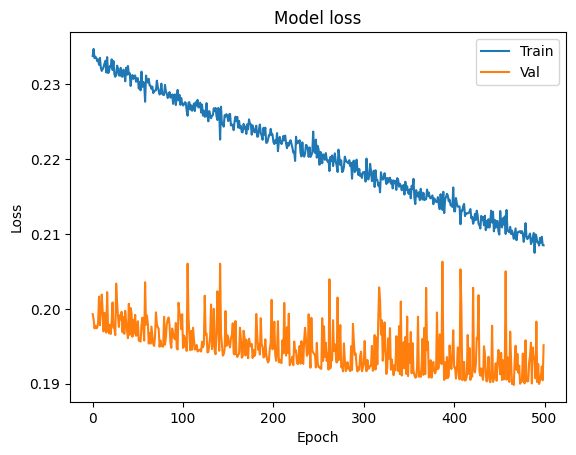

In [27]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Regularization MODEL 2

In [28]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 30ms/step - loss: 0.5639 - accuracy: 0.7476 - val_loss: 0.4576 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 26ms/step - loss: 0.3755 - accuracy: 0.8464 - val_loss: 0.3400 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 0.3329 - accuracy: 0.8738 - val_loss: 0.3100 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 24ms/step - loss: 0.3016 - accuracy: 0.8816 - val_loss: 0.2598 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 0.2907 - accuracy: 0.8748 - val_loss: 0.2657 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2652 - accuracy: 0.8953 - val_loss: 0.2420 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2576 - accuracy: 0.8943 - val_loss: 0.3148 - val_accuracy: 0.8539
Epoch 

Regularization L2

ADAM OPTIMIZER

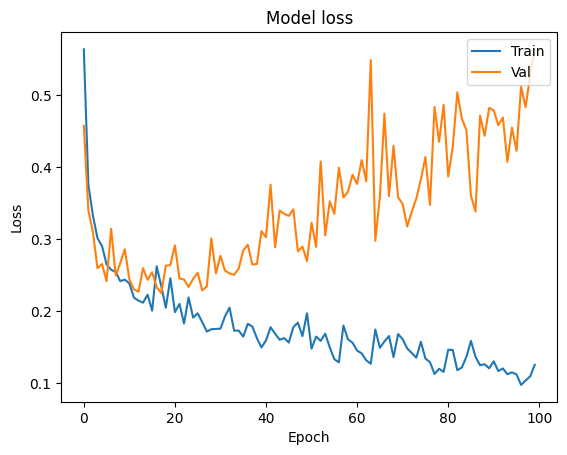

In [29]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Reducing OverFitting

MODEL 3

Neural dropout

In [31]:
from keras.layers import Dropout
from keras import regularizers

In [32]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [33]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 37ms/step - loss: 14.2225 - accuracy: 0.6282 - val_loss: 3.8954 - val_accuracy: 0.8082
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 1.6653 - accuracy: 0.8317 - val_loss: 0.6310 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.5633 - accuracy: 0.8611 - val_loss: 0.5442 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5126 - accuracy: 0.8757 - val_loss: 0.4668 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4832 - accuracy: 0.8855 - val_loss: 0.4391 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4888 - accuracy: 0.8826 - val_loss: 0.4766 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4913 - accuracy: 0.8650 - val_loss: 0.4402 - val_accuracy: 0.8950
Epoch

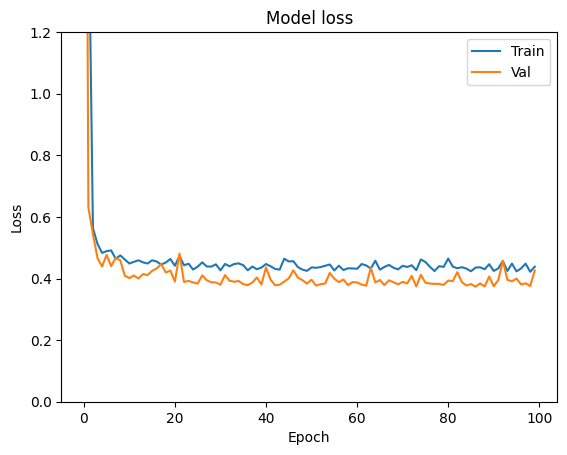

In [34]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

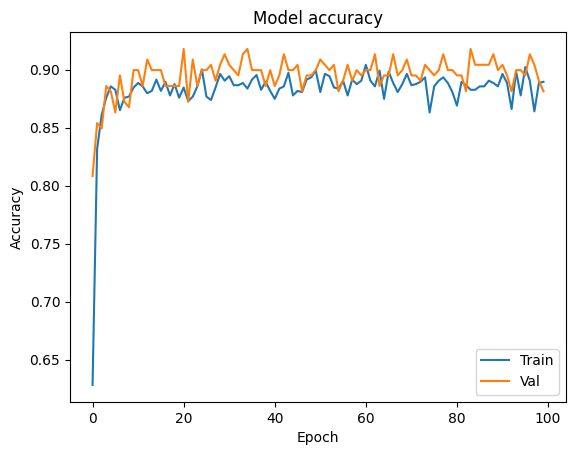

In [36]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

INPUT OUTPUT

In [43]:
input2=[[13175,6,6,1542,2,0,3,7,2,500]]
output2=model_3.predict(input2)
print(output2)
if output2==1:
    print("price is over 150000")
else:   
    print("price is around 90000 to 120000")

1/1 [==============================] - 0s 47ms/step
[[1.]]
price is over 150000


ANVIL WEBAPP

In [44]:
import anvil.server
anvil.server.connect("7G3PZMRY3QUBQTS2DGEB3SDD-3WNSAMXCIVXX6LSA")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
import anvil.media
@anvil.server.callable
def houseprice(text):
    with anvil.TextArea.TempFile(file) as filename:
        lotarea=int(input())
        overallqual=int(input())
        overallcond=int(input())
        totalbsmtsf=int(input())
        fullbath=int(input())
        halfbath=int(input())
        bedroomabvgr=int(input())
        totRmsabvgrd=int(input())
        fireplaces=int(input())
        garagearea=int(input())
    l=[]
    l.append(lotarea)
    l.append(overallqual)
    l.append(overallcond)
    l.append(totalbsmtsf)
    l.append(fullbath)
    l.append(halfbath)
    l.append(bedroomabvgr)
    l.append(totRmsabvgrd)
    l.append(fireplaces)
    l.append(garagearea)
    op=model_3.predict(l)
    return("150k" if op==1 else "90k")